C:\Users\mnace\AppData\Local\Temp\ipykernel_38720\270588163.py:35: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv(train_path, parse_dates=['Date'])


train_df shape: (1017209, 9)
store_df shape: (1115, 10)
rossmann_df shape: (1017209, 18)

--- HEAD ---


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1



--- INFO ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   Store          1017209 non-null  int64         
 1   DayOfWeek      1017209 non-null  int64         
 2   Date           1017209 non-null  datetime64[ns]
 3   Sales          1017209 non-null  int64         
 4   Customers      1017209 non-null  int64         
 5   Open           1017209 non-null  int64         
 6   Promo          1017209 non-null  int64         
 7   StateHoliday   1017209 non-null  object        
 8   SchoolHoliday  1017209 non-null  int64         
dtypes: datetime64[ns](1), int64(7), object(1)
memory usage: 69.8+ MB


None


--- DESCRIBE ---


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1017209,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,2014-04-11 01:30:42.846061824,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
min,1.000000e+00,1.000000e+00,2013-01-01 00:00:00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,2013-08-17 00:00:00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,2014-04-02 00:00:00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,2014-12-12 00:00:00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,2015-07-31 00:00:00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00
std,3.219087e+02,1.997391e+00,NaN,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01


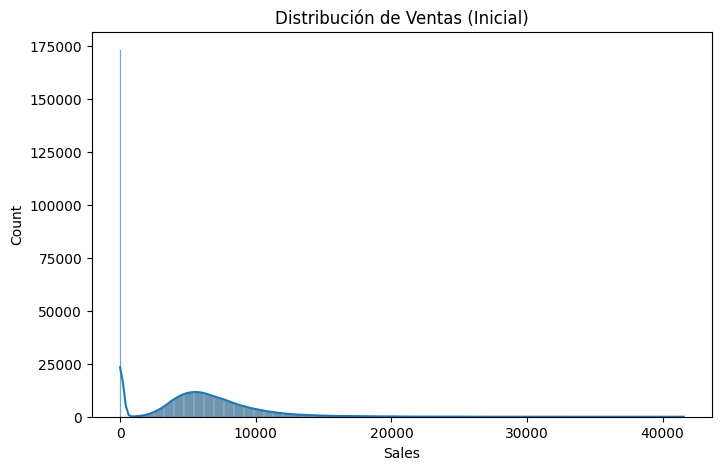

C:\Users\mnace\AppData\Local\Temp\ipykernel_38720\270588163.py:95: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['CompetitionDistance'].fillna(median_distance, inplace=True)
C:\Users\mnace\AppData\Local\Temp\ipykernel_38720\270588163.py:98: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a

rossmann_cleaned shape: (835892, 21)


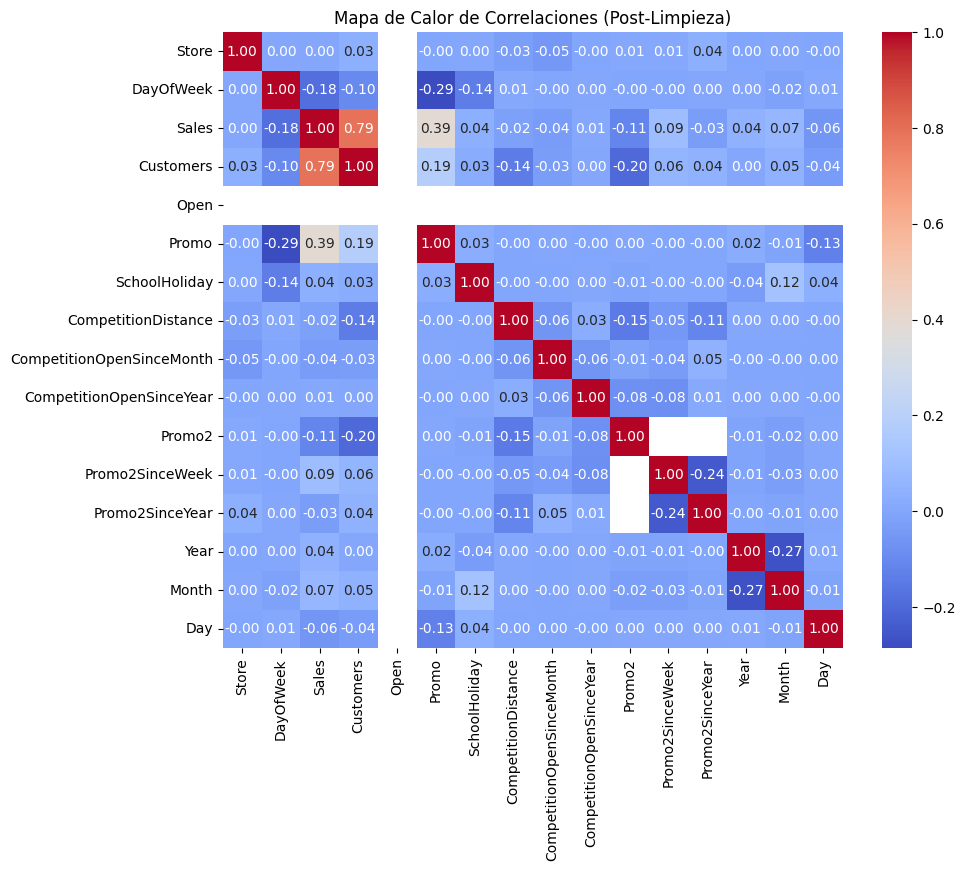

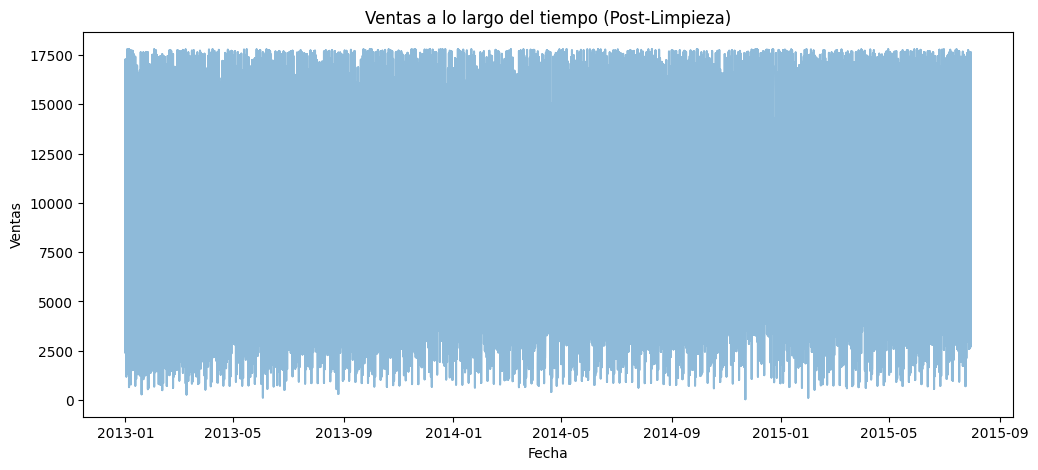

Datos limpios guardados en: DATA/rossmann_final.csv


In [14]:
# --------------------------------------------------------------------------------
# EJEMPLO DE NOTEBOOK UNIFICADO
# --------------------------------------------------------------------------------

# 1. Imports y Configuración
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Si deseas logs en un archivo, podrías usar:
import logging
logging.basicConfig(
    filename="data_cleaning.log",
    level=logging.INFO,
    format="%(asctime)s - [%(levelname)s] - %(message)s",
    datefmt="%Y-%m-%d %H:%M:%S"
)
logging.info("Iniciando notebook de análisis unificado.")

# -----------------------------------------------------------------------------
# 2. Carga de Datos
# -----------------------------------------------------------------------------
train_path = "DATA/train.csv"
store_path = "DATA/store.csv"
test_path = "DATA/test.csv"  # opcional

# Verificamos si existen los archivos
if not os.path.exists(train_path):
    raise FileNotFoundError(f"No se encontró {train_path}")
if not os.path.exists(store_path):
    raise FileNotFoundError(f"No se encontró {store_path}")

train_df = pd.read_csv(train_path, parse_dates=['Date'])
store_df = pd.read_csv(store_path)
logging.info("Archivos train y store cargados correctamente.")

# Opcional: cargar test.csv
test_df = None
if os.path.exists(test_path):
    test_df = pd.read_csv(test_path, parse_dates=['Date'])
    logging.info(f"Archivo test.csv cargado: {test_df.shape}")
else:
    logging.warning("No se encontró test.csv")

print("train_df shape:", train_df.shape)
print("store_df shape:", store_df.shape)

# -----------------------------------------------------------------------------
# 3. Unión de DataFrames
# -----------------------------------------------------------------------------
def merge_data(train_df, store_df):
    df_merged = pd.merge(train_df, store_df, on='Store', how='left')
    logging.info("Unión de DataFrames (train y store) completada correctamente.")
    return df_merged

rossmann_df = merge_data(train_df, store_df)
print("rossmann_df shape:", rossmann_df.shape)

# -----------------------------------------------------------------------------
# 4. EDA Inicial
# -----------------------------------------------------------------------------
def initial_eda(df):
    logging.info("Iniciando EDA inicial...")

    print("\n--- HEAD ---")
    display(df.head())

    print("\n--- INFO ---")
    display(df.info())

    print("\n--- DESCRIBE ---")
    display(df.describe())

    if 'Sales' in df.columns:
        plt.figure(figsize=(8, 5))
        sns.histplot(df['Sales'], kde=True)
        plt.title('Distribución de Ventas (Inicial)')
        plt.show()

    logging.info("EDA inicial completado.")

initial_eda(train_df)

# -----------------------------------------------------------------------------
# 5. Limpieza y Transformaciones
# -----------------------------------------------------------------------------
def clean_and_transform_data(df):
    logging.info("Iniciando limpieza y transformación de datos...")

    # Manejo de valores nulos (ejemplo)
    if 'CompetitionDistance' in df.columns:
        median_distance = df['CompetitionDistance'].median()
        df['CompetitionDistance'].fillna(median_distance, inplace=True)

    if 'PromoInterval' in df.columns:
        df['PromoInterval'].fillna('None', inplace=True)

    # Creación de columnas de fecha
    if 'Date' in df.columns:
        df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
        df['Year'] = df['Date'].dt.year
        df['Month'] = df['Date'].dt.month
        df['Day'] = df['Date'].dt.day

    # Filtrado de datos (ejemplo)
    if 'Open' in df.columns:
        df = df[df['Open'] == 1].copy()

    if 'Sales' in df.columns:
        df = df[df['Sales'] > 0].copy()
        upper_limit = df['Sales'].quantile(0.99)
        df = df[df['Sales'] < upper_limit].copy()

    logging.info("Limpieza y transformación completadas con éxito.")
    return df

rossmann_cleaned = clean_and_transform_data(rossmann_df)
print("rossmann_cleaned shape:", rossmann_cleaned.shape)

# -----------------------------------------------------------------------------
# 6. EDA Final
# -----------------------------------------------------------------------------
def final_eda(df):
    logging.info("Iniciando EDA final...")

    # Mapa de calor de correlaciones
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    if len(numeric_cols) > 1:
        plt.figure(figsize=(10, 8))
        sns.heatmap(df[numeric_cols].corr(), annot=True, fmt=".2f", cmap='coolwarm')
        plt.title("Mapa de Calor de Correlaciones (Post-Limpieza)")
        plt.show()

    # Tendencia de ventas a lo largo del tiempo
    if 'Date' in df.columns and 'Sales' in df.columns and df['Date'].isnull().sum() == 0:
        df_sorted = df.sort_values(by='Date')
        plt.figure(figsize=(12, 5))
        plt.plot(df_sorted['Date'], df_sorted['Sales'], alpha=0.5)
        plt.title("Ventas a lo largo del tiempo (Post-Limpieza)")
        plt.xlabel("Fecha")
        plt.ylabel("Ventas")
        plt.show()

    logging.info("EDA final completado.")

final_eda(rossmann_cleaned)

# -----------------------------------------------------------------------------
# 7. Guardado de Resultados
# -----------------------------------------------------------------------------
output_path = "DATA/rossmann_final.csv"
rossmann_cleaned.to_csv(output_path, index=False)
print(f"Datos limpios guardados en: {output_path}")
logging.info(f"Datos limpios guardados en: {output_path}")
